<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

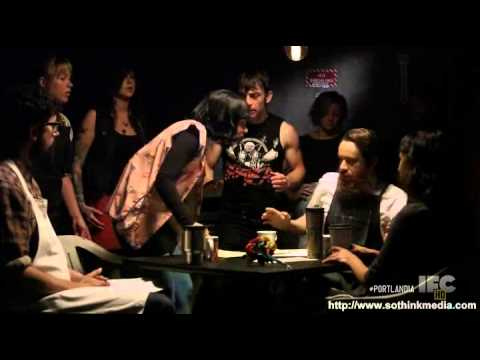

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\ThePi\\Desktop\\Python\\Lambda\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops['star_rating'] = shops['star_rating'].str.strip(' star rating').astype(float)

In [5]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [6]:
shops['date'] = pd.to_datetime(shops['full_review_text'].apply(lambda x: x.strip().split(' ')[0]))
shops['date']

0      2016-11-25
1      2016-12-02
2      2016-11-30
3      2016-11-25
4      2016-12-03
          ...    
7611   2015-02-19
7612   2016-01-21
7613   2015-04-30
7614   2015-08-02
7615   2015-05-23
Name: date, Length: 7616, dtype: datetime64[ns]

In [7]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.strip().split(' ', 1)[1])
shops['full_review_text']

0       1 check-in Love love loved the atmosphere! Eve...
1       Listed in Date Night: Austin, Ambiance in Aust...
2       1 check-in Listed in Brunch Spots I loved the ...
3       Very cool decor! Good drinks Nice seating  How...
4       1 check-in They are located within the Northcr...
                              ...                        
7611    I actually step into this restaurant by chance...
7612    Ok, The Steeping Room IS awesome. How do they ...
7613    Loved coming here for tea, and the atmosphere ...
7614    The food is just average. The booths didn't fe...
7615    I finally stopped in for lunch with my colleag...
Name: full_review_text, Length: 7616, dtype: object

In [8]:
shops['check_in_count'] = shops[shops['full_review_text'].apply(lambda x: 'check-in' in x[2:12])]['full_review_text'].apply(lambda x: x.split()[0]).astype(int)
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,check_in_count
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,2016-11-25,1.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,2016-12-02,NaN
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,2016-11-30,1.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,2016-11-25,NaN
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,2016-12-03,1.0


In [9]:
shops['coffee_shop_name'].nunique()

79

In [10]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,check_in_count
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,2016-11-25,1.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,2016-12-02,NaN
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,2016-11-30,1.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,2016-11-25,NaN
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,2016-12-03,1.0


In [11]:
def countDigit(n): 
    count = 0
    while n != 0: 
        n //= 10
        count+= 1
    return count

shops.iloc[0, 1][10 + countDigit(int(shops.iloc[0, 4])):]

'Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?'

In [12]:
def transform(df):
    df = df.copy()
    
    for i, val in zip(df.index, df['full_review_text']):
        try:
            df.iloc[i, 1] = df.iloc[i, 1][10 + countDigit(int(df.iloc[i, 4])):]
        except:
            #failure means the value was NaN
            pass
        
    return df


In [13]:
shops['full_review_text'] = transform(shops)['full_review_text'].str.lower()
shops['full_review_text']

0       love love loved the atmosphere! every corner o...
1       listed in date night: austin, ambiance in aust...
2       listed in brunch spots i loved the eclectic an...
3       very cool decor! good drinks nice seating  how...
4       they are located within the northcross mall sh...
                              ...                        
7611    i actually step into this restaurant by chance...
7612    ok, the steeping room is awesome. how do they ...
7613    loved coming here for tea, and the atmosphere ...
7614    the food is just average. the booths didn't fe...
7615    i finally stopped in for lunch with my colleag...
Name: full_review_text, Length: 7616, dtype: object

In [14]:
import re

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
shops['full_review_text']

0       love love loved the atmosphere every corner of...
1       listed in date night austin ambiance in austin...
2       listed in brunch spots i loved the eclectic an...
3       very cool decor good drinks nice seating  howe...
4       they are located within the northcross mall sh...
                              ...                        
7611    i actually step into this restaurant by chance...
7612    ok the steeping room is awesome how do they ha...
7613    loved coming here for tea and the atmosphere w...
7614    the food is just average the booths didnt feel...
7615    i finally stopped in for lunch with my colleag...
Name: full_review_text, Length: 7616, dtype: object

In [15]:
# Base
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [17]:
tokenize = lambda x: x.split()

In [18]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops['tokens']

0       [love, love, loved, the, atmosphere, every, co...
1       [listed, in, date, night, austin, ambiance, in...
2       [listed, in, brunch, spots, i, loved, the, ecl...
3       [very, cool, decor, good, drinks, nice, seatin...
4       [they, are, located, within, the, northcross, ...
                              ...                        
7611    [i, actually, step, into, this, restaurant, by...
7612    [ok, the, steeping, room, is, awesome, how, do...
7613    [loved, coming, here, for, tea, and, the, atmo...
7614    [the, food, is, just, average, the, booths, di...
7615    [i, finally, stopped, in, for, lunch, with, my...
Name: tokens, Length: 7616, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [19]:
word_counts = Counter()
shops['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [20]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [21]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,the,6847,34809,1.0,0.045313,0.045313,0.899028
35,and,6864,26650,2.0,0.034692,0.080005,0.901261
12,a,6246,22755,3.0,0.029621,0.109626,0.820116
16,i,5528,20237,4.0,0.026344,0.135970,0.725840
65,to,5653,17164,5.0,0.022343,0.158313,0.742253


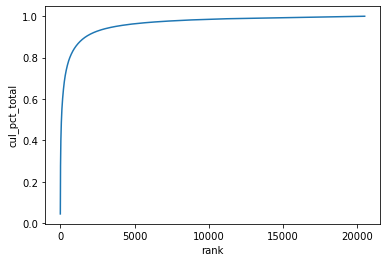

In [22]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

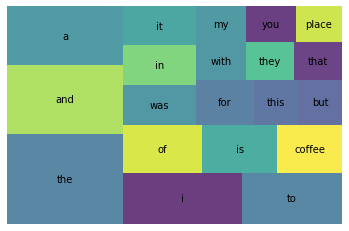

In [23]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [26]:
nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab, )
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops

,coffee_shop_name,full_review_text,star_rating,date,check_in_count,tokens
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5.0,2016-11-25,1.0,"[love, love, loved, the, atmosphere, every, co..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4.0,2016-12-02,NaN,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4.0,2016-11-30,1.0,"[listed, in, brunch, spots, i, loved, the, ecl..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2.0,2016-11-25,NaN,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4.0,2016-12-03,1.0,"[they, are, located, within, the, northcross, ..."
...,...,...,...,...,...,...
7611,The Steeping Room,i actually step into this restaurant by chance...,4.0,2015-02-19,NaN,"[i, actually, step, into, this, restaurant, by..."
7612,The Steeping Room,ok the steeping room is awesome how do they ha...,5.0,2016-01-21,NaN,"[ok, the, steeping, room, is, awesome, how, do..."
7613,The Steeping Room,loved coming here for tea and the atmosphere w...,4.0,2015-04-30,NaN,"[loved, coming, here, for, tea, and, the, atmo..."
7614,The Steeping Room,the food is just average the booths didnt feel...,3.0,2015-08-02,NaN,"[the, food, is, just, average, the, booths, di..."


In [29]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,the,6847,34809,1.0,0.044146,0.044146,0.899028
35,and,6864,26650,2.0,0.033799,0.077945,0.901261
12,a,6246,22755,3.0,0.028859,0.106804,0.820116
16,i,5528,20237,4.0,0.025665,0.132469,0.725840
55,,5040,19176,5.0,0.024320,0.156789,0.661765


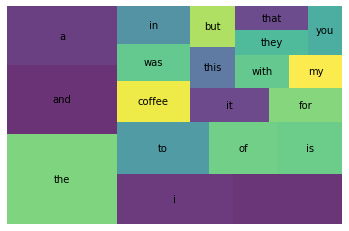

In [30]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

